In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style='darkgrid', font_scale=1.5)

In [14]:
data = pd.read_excel('lab11data.xlsx')
lambdas_neon = np.array(data.iloc[0:29, 0])
lambdas_rtut = np.array([6907, 6234, 5791, 5770, 5461, 4916, 4358, 4047])
lambdas = np.concatenate((lambdas_neon, lambdas_rtut))

In [15]:
phis_neon = np.array([2608, 2574, 2514, 2498, 2470, 2446, 2438, 2401, 2394, 2376, 2366, 2351, 2330, 2308, 2298, 2279, 2270, 2250, 2222, 2210, 2178, 2165, 1901, 1856, 1850])
phis_rtut = np.array([2562, 2338, 2132, 2121, 1942, 1518, 852, 302])
phis = np.concatenate((phis_neon, phis_rtut))

phis_vodorod = np.array([2456, 1465, 810])
phis_iod = np.array([2886, 2280, 1720])

In [23]:
plf = np.polyfit(phis, lambdas, 2, full= True)
x_new = np.linspace(300, 3000, 250)
y_new = np.polyval(plf[0], x_new)
err = np.sqrt(plf[1])
err

lambda_data = np.polyval(plf[0], phis_vodorod)
lambda_data_iod = np.polyval(plf[0], phis_iod)
lambda_data

array([6546.34896545, 4741.01816718, 4202.75909382])

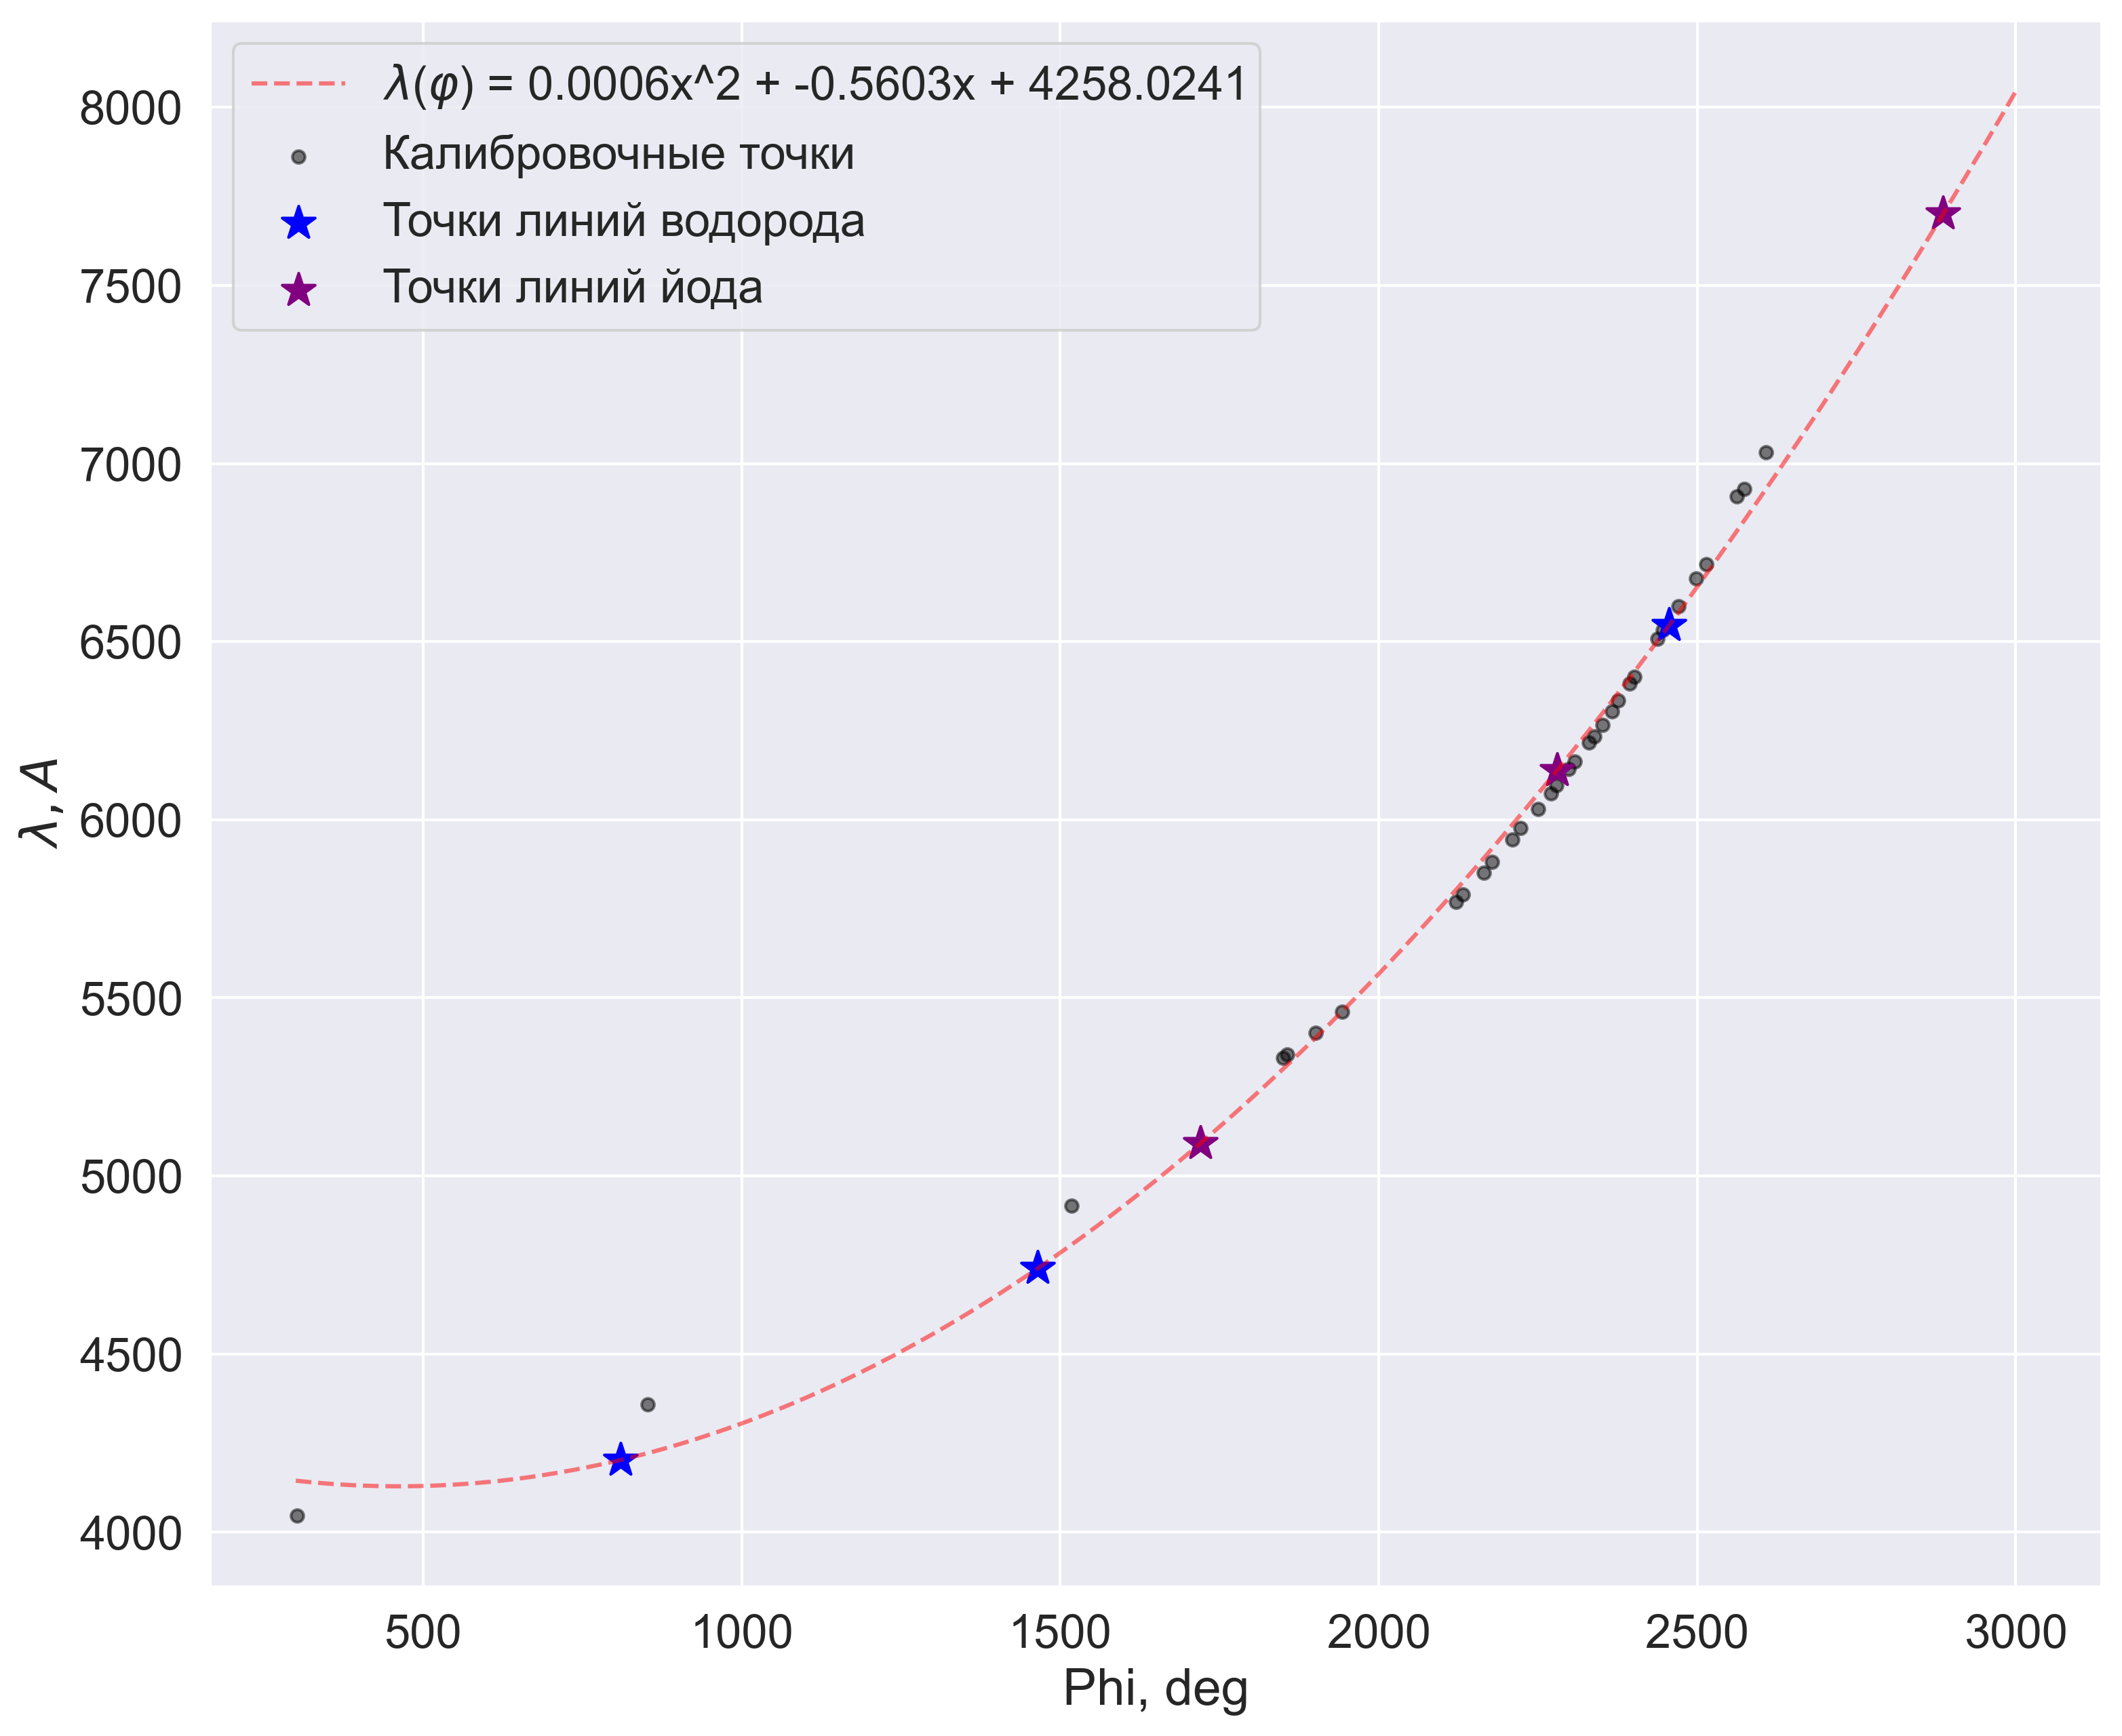

In [32]:
plt.figure(figsize= (12,10), dpi=300)
plt.plot(x_new, y_new, c = 'red', linestyle = '--', alpha = 0.5, label = f'$\lambda$($\\varphi$) = {plf[0][0]:.4f}x^2 + {plf[0][1]:.4f}x + {plf[0][2]:.4f}')
plt.scatter(phis, lambdas, c= 'black', s = 20, alpha = 0.5, label = 'Калибровочные точки')
plt.scatter(phis_vodorod, lambda_data, c = 'blue', marker='*', s = 150, label = 'Точки линий водорода')
plt.scatter(phis_iod, lambda_data_iod, c = 'purple', marker='*', s = 150, label = 'Точки линий йода')
plt.legend()
plt.xlabel('Phi, deg')
plt.ylabel('$\lambda, A$')
plt.savefig('plot1.png')

In [62]:
y = 1 / (lambda_data/10)
f = lambda x: 1/4 - 1./(x**2)
x_raw = np.array([3, 4, 5])
x = f(x_raw)

Pn = np.polyfit(x, y, 1)
y_new = np.polyval(Pn, x)

R1 = y[0] * (1 / (1 / 4 - 1 / 9.))
R2 = y[1] * (1 / (1 / 4 - 1 / 16.))
R3 = y[2] * (1 / (1 / 4 - 1 / 25.))
print(np.mean((R1, R2, R3)) * 10**9)


11192754.664268244
